# Vortex solutions

```{include} live.md
```

```{warning}
Sorted out vortex error - need to move on to energy considerations for flux penetration.
```

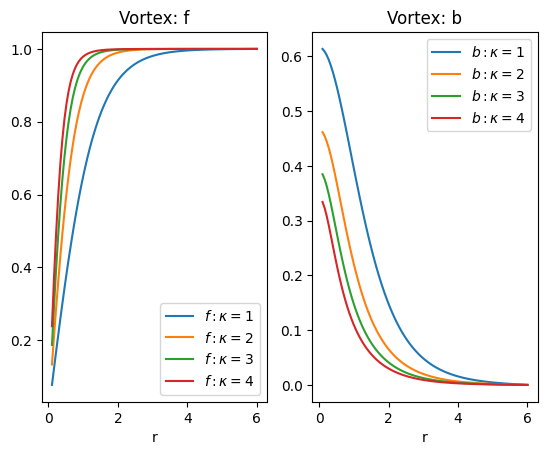

In [1]:
from glcd import glrplot 
import matplotlib.pyplot as plt

n=-1 # -1 give positive b field
a,b=0.1,6
for kappa in range(1,5):
  glrplot(kappa,n,a,b,f"\kappa={kappa}")

plt.subplot(1, 2, 1)
plt.xlabel("r")
plt.title(f"Vortex: f")
plt.legend()
plt.subplot(1, 2, 2)
plt.xlabel("r")
plt.title(f"Vortex: b")
plt.legend()
plt.show()

We have set the boundary conditions so that the differential system does not blow up as the r limits tend to zero and infinity. The magnetic flux should be constant. One needs to remember the area is cylindrically symmetric, and given by:

$$\Phi=2\pi\int b r dr$$

Hopefully the different heights as $r \rightarrow 0$ are damped by the $r$ factor in the integral.

In [2]:
from glcd import glradial
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

kappa=1
n=-1 # -1 give positive b field
a,b=0.001,20


sol=glradial(kappa,n,a,b)

def phi(r):
  f,df,a,da=sol.sol(r)
  b=da+a/r
  return 2*np.pi*r*b

quad(phi,a,b)

/tmp/ipykernel_5016/303143283.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(phi,a,b)


(-9.71118887962702e+268, 1.1317816720990663e+266)

In [3]:
f,df,a,da=sol.sol(b)
a

-8.921120138461384e+87

In [4]:
2*np.pi/kappa/b

0.3141592653589793

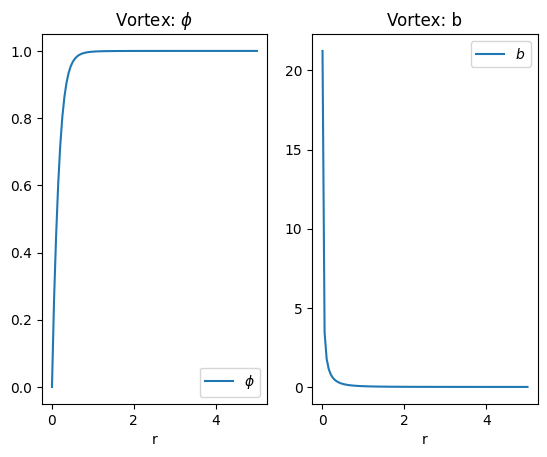

In [5]:
from glcd import glrplot 
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
kappa=6
n=-1 # -1 give positive b field
a,b=0.01,5
nodes=5
def dY(x,Y): # Y=[f,df,a,b=da]
  f,df,rhoa,rhob = Y
  rhoank=rhoa+n/kappa
  return np.vstack((df, kappa*kappa*f*(f**2+(rhoank/x)**2-1)-df/x,rhob,rhoank*f**2/x))
def bc(Ya, Yb):
  return np.array([Ya[0], Yb[0]-1, Yb[3],Ya[2]])
rng=[a, b]
x = np.linspace(*rng, nodes)
Y = np.zeros((4, x.size))
for k in range(x.size): # initialize f to 1
  Y[0,k]=1
sol=solve_bvp(dY, bc, x, Y)
r_plot = np.linspace(a,b, 100)
plots=sol.sol(r_plot)
f=plots[0] # f
plt.subplot(1, 2, 1)
plt.plot(r_plot, f,label=f"$\phi$")
plt.subplot(1, 2, 2)
b = plots[3]/r_plot # b=da+a/x
plt.plot(r_plot, b,label=f"$b$")

plt.subplot(1, 2, 1)
plt.xlabel("r")
plt.title(f"Vortex: $\phi$")
plt.legend()
plt.subplot(1, 2, 2)
plt.xlabel("r")
plt.title(f"Vortex: b")
plt.legend()
plt.show()

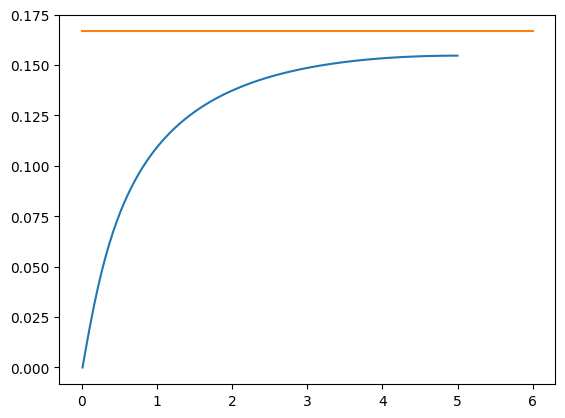

In [6]:
plt.plot(r_plot,plots[2])
plt.plot([0,6],[-n/kappa,-n/kappa])

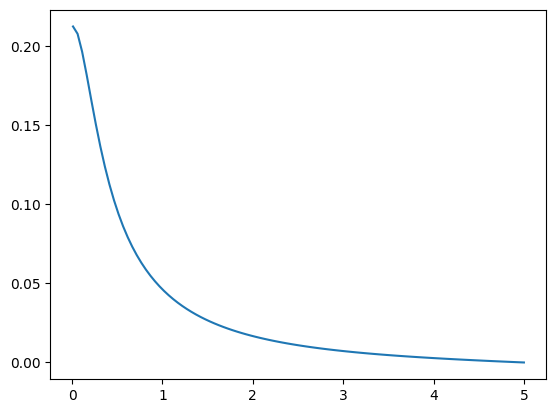

In [7]:
plt.plot(r_plot,plots[3])